In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 

#Import API Key
from api_key import fbi_cde_key

In [2]:
# Load the Data from Kento's API pull
file_path = "./Resources/state_id.csv"
state_id_df = pd.read_csv(file_path)
pd.DataFrame(state_id_df)
state_id_df.loc[:, ["State_ID"]].head()

,State_ID
0,AL
1,AK
2,AS
3,AZ
4,AR


In [3]:
state_id_list = state_id_df["State_ID"].tolist()
print(state_id_list)

['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FM', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MH', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PW', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY']


In [4]:
for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2017&to=2021&API_KEY={fbi_cde_key}"
    print(url)

https://api.usa.gov/crime/fbi/cde/arrest/state/AL/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/AK/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/AS/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/AZ/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/AR/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/CA/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/CO/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/CT/property_crime?from=2017&t

In [5]:
data_list = []

for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2017&to=2021&API_KEY={fbi_cde_key}"
    response = requests.get(url).json()

    data = response["data"]
    for data_list_response in data:
        data_list_response ["state "] = state_id
        data_list.append(data_list_response)

In [6]:
data_list

[{'data_year': 2017,
  'Motor Vehicle Theft': 877,
  'Arson': 104,
  'Burglary': 2880,
  'Embezzlement': 152,
  'Forgery and Counterfeiting': 1109,
  'Fraud': 2819,
  'Larceny - Theft': 13959,
  'Vandalism': 1256,
  'Stolen Property: Buying, Receiving, Possessing': 2280,
  'state ': 'AL'},
 {'data_year': 2018,
  'Motor Vehicle Theft': 994,
  'Arson': 110,
  'Burglary': 2809,
  'Embezzlement': 150,
  'Forgery and Counterfeiting': 983,
  'Fraud': 2611,
  'Larceny - Theft': 14513,
  'Vandalism': 1234,
  'Stolen Property: Buying, Receiving, Possessing': 2177,
  'state ': 'AL'},
 {'data_year': 2019,
  'Motor Vehicle Theft': 920,
  'Arson': 88,
  'Burglary': 2198,
  'Embezzlement': 140,
  'Forgery and Counterfeiting': 846,
  'Fraud': 2309,
  'Larceny - Theft': 13555,
  'Vandalism': 1183,
  'Stolen Property: Buying, Receiving, Possessing': 1881,
  'state ': 'AL'},
 {'data_year': 2020,
  'Motor Vehicle Theft': 20,
  'Arson': 3,
  'Burglary': 65,
  'Embezzlement': 7,
  'Forgery and Counterfeiti

In [7]:
json_data = json.dumps(data_list, indent=4)

file_path = "FBI_Data_Raw.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data)

print(f"API response saved to {file_path}")

API response saved to FBI_Data_Raw.json


In [8]:
# To avoid polling the API again, we can pull the data from the saved JSON.
pull_json = "FBI_Data_Raw.json"

json_response_df = pd.read_json(pull_json)
json_response_df

,data_year,Motor Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Larceny - Theft,Vandalism,"Stolen Property: Buying, Receiving, Possessing",state
0,2017,877,104,2880,152,1109,2819,13959,1256,2280,AL
1,2018,994,110,2809,150,983,2611,14513,1234,2177,AL
2,2019,920,88,2198,140,846,2309,13555,1183,1881,AL
3,2020,20,3,65,7,34,56,435,29,46,AL
4,2021,320,24,696,4,195,431,2561,627,622,AL
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,130,38,217,18,49,158,1995,493,94,WY
252,2018,128,19,243,6,36,127,1818,419,80,WY
253,2019,104,27,229,1,29,112,1562,467,55,WY
254,2020,149,18,211,2,19,97,1640,502,50,WY


In [9]:
# Clean the Dataframe
crime_df = json_response_df.rename(columns=
                              {"data_year": "Year",
                               "Motor Vehicle Theft": "Vehicle Theft",
                               "state ": "State",
                               "Stolen Property: Buying, Receiving, Possessing": "Dealing in Stolen Property"
                              })
crime_df


,Year,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Larceny - Theft,Vandalism,Dealing in Stolen Property,State
0,2017,877,104,2880,152,1109,2819,13959,1256,2280,AL
1,2018,994,110,2809,150,983,2611,14513,1234,2177,AL
2,2019,920,88,2198,140,846,2309,13555,1183,1881,AL
3,2020,20,3,65,7,34,56,435,29,46,AL
4,2021,320,24,696,4,195,431,2561,627,622,AL
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,130,38,217,18,49,158,1995,493,94,WY
252,2018,128,19,243,6,36,127,1818,419,80,WY
253,2019,104,27,229,1,29,112,1562,467,55,WY
254,2020,149,18,211,2,19,97,1640,502,50,WY


In [10]:
crime_df_cleaned = crime_df[["Year", 
                        "State", 
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property"
                       ]]
crime_df_cleaned

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881
3,2020,AL,435,20,3,65,7,34,56,29,46
4,2021,AL,2561,320,24,696,4,195,431,627,622
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94
252,2018,WY,1818,128,19,243,6,36,127,419,80
253,2019,WY,1562,104,27,229,1,29,112,467,55
254,2020,WY,1640,149,18,211,2,19,97,502,50


In [29]:
census_path = "./Resources/census_data.csv"

census_df = pd.read_csv(census_path)
census_df.head()

,State,State_Name,Population
0,AL,Alabama,4921532
1,AK,Alaska,731158
2,AZ,Arizona,7421401
3,AR,Arkansas,3030522
4,CA,California,39368078


In [30]:
# Combine the Crime and Census Dataframes
crime_census_combined = crime_df_cleaned.merge(census_df,how="left", on=["State", "State"])
crime_census_combined

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280,Alabama,4921532.0
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177,Alabama,4921532.0
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881,Alabama,4921532.0
3,2020,AL,435,20,3,65,7,34,56,29,46,Alabama,4921532.0
4,2021,AL,2561,320,24,696,4,195,431,627,622,Alabama,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94,Wyoming,582328.0
252,2018,WY,1818,128,19,243,6,36,127,419,80,Wyoming,582328.0
253,2019,WY,1562,104,27,229,1,29,112,467,55,Wyoming,582328.0
254,2020,WY,1640,149,18,211,2,19,97,502,50,Wyoming,582328.0


In [31]:
# Add the crime columns together in each row to crete a "Total Arrests" column
crime_census_combined["Total Arrests"] = crime_census_combined["Larceny - Theft"] + crime_census_combined["Vehicle Theft"] + crime_census_combined["Arson"] + crime_census_combined["Burglary"] + crime_census_combined["Embezzlement"] + crime_census_combined["Forgery and Counterfeiting"] + crime_census_combined["Fraud"] + crime_census_combined["Vandalism"] + crime_census_combined["Dealing in Stolen Property"]
crime_census_combined

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population,Total Arrests
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280,Alabama,4921532.0,25436
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177,Alabama,4921532.0,25581
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881,Alabama,4921532.0,23120
3,2020,AL,435,20,3,65,7,34,56,29,46,Alabama,4921532.0,695
4,2021,AL,2561,320,24,696,4,195,431,627,622,Alabama,4921532.0,5480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94,Wyoming,582328.0,3192
252,2018,WY,1818,128,19,243,6,36,127,419,80,Wyoming,582328.0,2876
253,2019,WY,1562,104,27,229,1,29,112,467,55,Wyoming,582328.0,2586
254,2020,WY,1640,149,18,211,2,19,97,502,50,Wyoming,582328.0,2688


In [33]:
# Put Total Arrests near the front of the dataframe
combined_cleaned = crime_census_combined[["Year", 
                       "State", 
                        "Total Arrests",
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property",
                        "State_Name",
                        "Population"
                       ]]
combined_cleaned

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population
0,2017,AL,25436,13959,877,104,2880,152,1109,2819,1256,2280,Alabama,4921532.0
1,2018,AL,25581,14513,994,110,2809,150,983,2611,1234,2177,Alabama,4921532.0
2,2019,AL,23120,13555,920,88,2198,140,846,2309,1183,1881,Alabama,4921532.0
3,2020,AL,695,435,20,3,65,7,34,56,29,46,Alabama,4921532.0
4,2021,AL,5480,2561,320,24,696,4,195,431,627,622,Alabama,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,3192,1995,130,38,217,18,49,158,493,94,Wyoming,582328.0
252,2018,WY,2876,1818,128,19,243,6,36,127,419,80,Wyoming,582328.0
253,2019,WY,2586,1562,104,27,229,1,29,112,467,55,Wyoming,582328.0
254,2020,WY,2688,1640,149,18,211,2,19,97,502,50,Wyoming,582328.0


In [34]:
# STEVE - Take this snippet of code from my workbook and add to yours

population_file = "./resources/census_data.csv"


population_df = pd.read_csv(population_file)
population_df.head()



,State,State_Name,Population
0,AL,Alabama,4921532
1,AK,Alaska,731158
2,AZ,Arizona,7421401
3,AR,Arkansas,3030522
4,CA,California,39368078


In [35]:
# STEVE - Take this snippet of code from my workbook and add to yours
    # Laura normalized "combined_cleaned" dataframe in Excel to create below fbi-crime-data-normalized.csv (new data frame)

crimes_file = "./fbi-crime-data-normalized.csv"

crimes_df = pd.read_csv(crimes_file)
crimes_df.head()

,State,Year,Crime,Arrests
0,AL,2017,Motor Vehicle Theft,877
1,AL,2018,Motor Vehicle Theft,994
2,AL,2019,Motor Vehicle Theft,920
3,AL,2020,Motor Vehicle Theft,20
4,AL,2021,Motor Vehicle Theft,320


In [36]:
# STEVE - Take this snippet of code from my workbook and add to yours

crimes_pop_df = crimes_df.merge(population_df, on="State")
crimes_pop_df.head()

,State,Year,Crime,Arrests,State_Name,Population
0,AL,2017,Motor Vehicle Theft,877,Alabama,4921532
1,AL,2018,Motor Vehicle Theft,994,Alabama,4921532
2,AL,2019,Motor Vehicle Theft,920,Alabama,4921532
3,AL,2020,Motor Vehicle Theft,20,Alabama,4921532
4,AL,2021,Motor Vehicle Theft,320,Alabama,4921532


In [37]:
# STEVE - Take this snippet of code from my workbook and add to yours

crimes_pop_df.to_csv("./crimes_pop.csv", index=False, header=True)


In [38]:
# STEVE - Take this snippet of code from my workbook and add to yours

# calculate per capita crime rate for each combo of state/year
crimes_pop_summary_df = crimes_pop_df.groupby(["State", "Year", "State_Name"]).sum(["Arrests"])

crimes_pop_summary_df.head()

Arrests  Population
State Year State_Name                     
AK    2017 Alaska         5213     6580422
      2018 Alaska         5395     6580422
      2019 Alaska         4507     6580422
      2020 Alaska         3812     6580422
      2021 Alaska          972     6580422

In [39]:
# STEVE - Take this snippet of code from my workbook and add to yours

# calculate per capita crime rate for each combo of state/year/crime
crime_rate_per_capita = crimes_pop_summary_df["Arrests"]/crimes_pop_summary_df["Population"]
crimes_pop_summary_df["Crime Rate Per Capita"] = crime_rate_per_capita 

crimes_pop_summary_df.head()


Arrests  Population  Crime Rate Per Capita
State Year State_Name                                            
AK    2017 Alaska         5213     6580422               0.000792
      2018 Alaska         5395     6580422               0.000820
      2019 Alaska         4507     6580422               0.000685
      2020 Alaska         3812     6580422               0.000579
      2021 Alaska          972     6580422               0.000148

In [40]:
# STEVE - Take this snippet of code from my workbook and add to yours

crimes_pop_summary_df.to_csv("./crimes_pop_summary.csv", index=True, header=True)


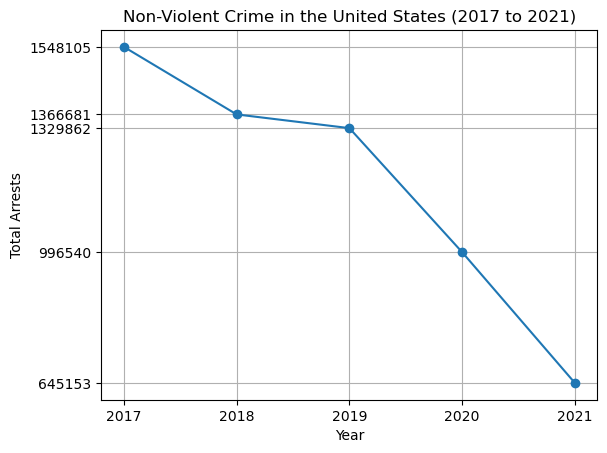

In [49]:
# Use the National Data to show the crime rate over time
# For Michelle:  We will need to redo this when we get the per-capita data from Laura

national_total = combined_cleaned.groupby("Year")["Total Arrests"].sum().reset_index()

plt.plot(national_total["Year"], national_total["Total Arrests"], marker="o")

plt.title("Non-Violent Crime in the United States (2017 to 2021)")
plt.xlabel("Year")
plt.ylabel("Total Arrests")

plt.yticks(national_total["Total Arrests"])
plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()


C:\Users\kento\AppData\Local\Temp\ipykernel_12000\3457807017.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  national_total = combined_cleaned.groupby("Year")[


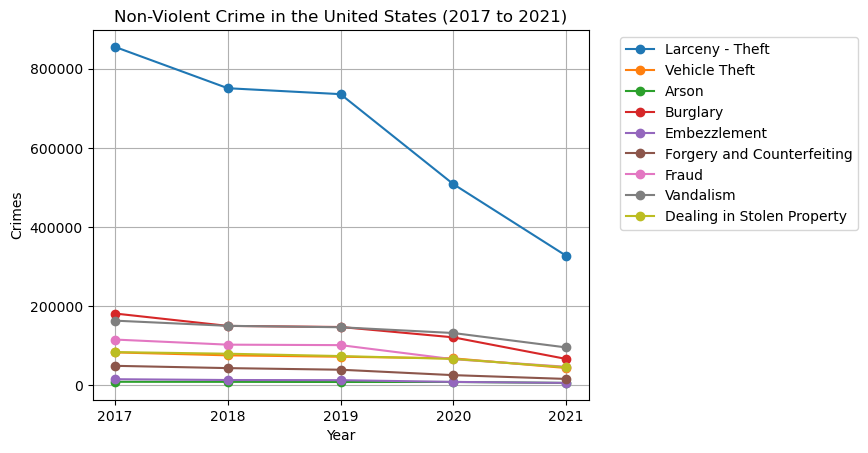

In [94]:
# Use the National Data to show the crime rate over time by crime type
national_total = combined_cleaned.groupby("Year")[
    "Total Arrests",
    "Larceny - Theft",
    "Vehicle Theft",
    "Arson",
    "Burglary",
    "Embezzlement",
    "Forgery and Counterfeiting",
    "Fraud",
    "Vandalism",
    "Dealing in Stolen Property"
    
].sum().reset_index()
                        
    


plt.plot(national_total["Year"], national_total["Larceny - Theft"], label="Larceny - Theft", marker="o")
plt.plot(national_total["Year"], national_total["Vehicle Theft"], label="Vehicle Theft", marker="o")
plt.plot(national_total["Year"], national_total["Arson"], label="Arson", marker="o")
plt.plot(national_total["Year"], national_total["Burglary"], label="Burglary", marker="o")
plt.plot(national_total["Year"], national_total["Embezzlement"], label="Embezzlement", marker="o")
plt.plot(national_total["Year"], national_total["Forgery and Counterfeiting"], label="Forgery and Counterfeiting", marker="o")
plt.plot(national_total["Year"], national_total["Fraud"], label="Fraud", marker="o")
plt.plot(national_total["Year"], national_total["Vandalism"], label="Vandalism", marker="o")
plt.plot(national_total["Year"], national_total["Dealing in Stolen Property"], label="Dealing in Stolen Property", marker="o")




plt.title("Non-Violent Crime in the United States (2017 to 2021)")
plt.xlabel("Year")
plt.ylabel("Crimes")

plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()


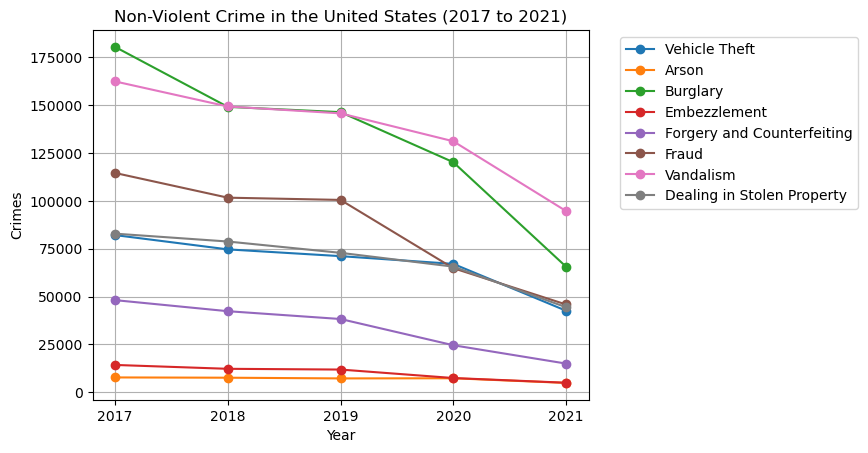

In [95]:
#Excludes outliner (Larceny - Theft) to show normalized pattern over year.

plt.plot(national_total["Year"], national_total["Vehicle Theft"], label="Vehicle Theft", marker="o")
plt.plot(national_total["Year"], national_total["Arson"], label="Arson", marker="o")
plt.plot(national_total["Year"], national_total["Burglary"], label="Burglary", marker="o")
plt.plot(national_total["Year"], national_total["Embezzlement"], label="Embezzlement", marker="o")
plt.plot(national_total["Year"], national_total["Forgery and Counterfeiting"], label="Forgery and Counterfeiting", marker="o")
plt.plot(national_total["Year"], national_total["Fraud"], label="Fraud", marker="o")
plt.plot(national_total["Year"], national_total["Vandalism"], label="Vandalism", marker="o")
plt.plot(national_total["Year"], national_total["Dealing in Stolen Property"], label="Dealing in Stolen Property", marker="o")




plt.title("Non-Violent Crime in the United States (2017 to 2021)")
plt.xlabel("Year")
plt.ylabel("Crimes")

plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()


In [97]:
combined_cleaned

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population
0,2017,AL,25436,13959,877,104,2880,152,1109,2819,1256,2280,Alabama,4921532.0
1,2018,AL,25581,14513,994,110,2809,150,983,2611,1234,2177,Alabama,4921532.0
2,2019,AL,23120,13555,920,88,2198,140,846,2309,1183,1881,Alabama,4921532.0
3,2020,AL,695,435,20,3,65,7,34,56,29,46,Alabama,4921532.0
4,2021,AL,5480,2561,320,24,696,4,195,431,627,622,Alabama,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,3192,1995,130,38,217,18,49,158,493,94,Wyoming,582328.0
252,2018,WY,2876,1818,128,19,243,6,36,127,419,80,Wyoming,582328.0
253,2019,WY,2586,1562,104,27,229,1,29,112,467,55,Wyoming,582328.0
254,2020,WY,2688,1640,149,18,211,2,19,97,502,50,Wyoming,582328.0


In [ ]:
#Alternative way to plot Michelle's CA, NY, and FL's year over year total arrests line graph

In [107]:
#Create total arrests df by year and states
state_total = combined_cleaned.groupby(["Year","State"])["Total Arrests"].sum().reset_index()
state_total

,Year,State,Total Arrests
0,2017,AK,5213
1,2017,AL,25436
2,2017,AR,17981
3,2017,AZ,52895
4,2017,CA,153175
...,...,...,...
251,2021,VT,1974
252,2021,WA,25072
253,2021,WI,21860
254,2021,WV,4062


In [108]:
#Filter by CA
ca_data = state_total[state_total['State'] == 'CA']
ca_data

,Year,State,Total Arrests
4,2017,CA,153175
55,2018,CA,141270
107,2019,CA,134707
158,2020,CA,113589
209,2021,CA,7060


In [109]:
#Filter by NY
ny_data = state_total[state_total['State'] == 'NY']
ny_data


,Year,State,Total Arrests
34,2017,NY,70330
85,2018,NY,63707
137,2019,NY,58327
188,2020,NY,45600
239,2021,NY,12490


In [110]:
#Filter by FL
fl_data = state_total[state_total['State'] == 'FL']
fl_data

,Year,State,Total Arrests
9,2017,FL,113871
60,2018,FL,3572
112,2019,FL,107224
163,2020,FL,83800
214,2021,FL,171


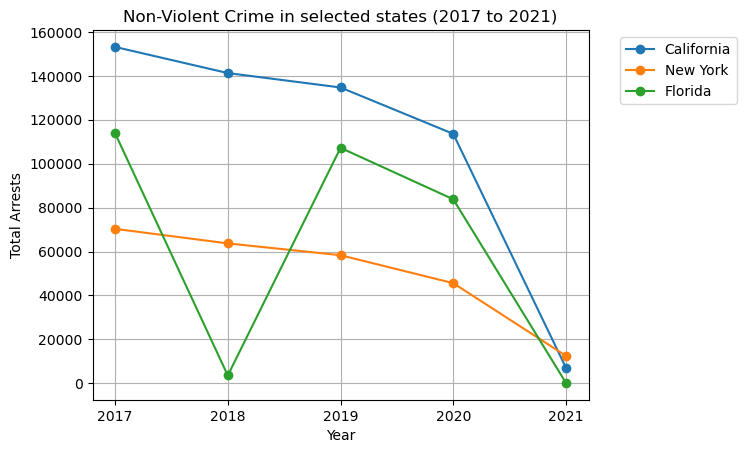

In [111]:
#Create line graph of total arrests by CA, NY, and FL year over year.

plt.plot(ca_data["Year"], ca_data["Total Arrests"], label="California", marker="o")
plt.plot(ny_data["Year"], ny_data["Total Arrests"], label="New York", marker="o")
plt.plot(fl_data["Year"], fl_data["Total Arrests"], label="Florida", marker="o")


plt.title("Non-Violent Crime in selected states (2017 to 2021)")
plt.xlabel("Year")
plt.ylabel("Total Arrests")

plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()


In [42]:
# Isolate Crime Data by year for later graphs.
# 2017
crime_df_2017 = combined_cleaned[combined_cleaned["Year"] == 2017]
crime_df_2017.head()

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population
0,2017,AL,25436,13959,877,104,2880,152,1109,2819,1256,2280,Alabama,4921532.0
5,2017,AK,5213,2356,694,22,623,77,113,219,1004,105,Alaska,731158.0
10,2017,AZ,52895,30433,1735,232,4251,457,1219,2142,10974,1452,Arizona,7421401.0
15,2017,AR,17981,9975,623,40,2138,60,859,918,1574,1794,Arkansas,3030522.0
20,2017,CA,153175,47080,19541,1573,38214,997,4449,6936,16962,17423,California,39368078.0


In [43]:
# 2018
crime_df_2018 = combined_cleaned[combined_cleaned["Year"] == 2018]
crime_df_2018.head()

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population
1,2018,AL,25581,14513,994,110,2809,150,983,2611,1234,2177,Alabama,4921532.0
6,2018,AK,5395,2392,726,43,602,54,154,201,1103,120,Alaska,731158.0
11,2018,AZ,49368,27123,1794,417,3993,854,1164,2183,10704,1136,Arizona,7421401.0
16,2018,AR,19783,11560,652,69,2020,54,905,972,1669,1882,Arkansas,3030522.0
21,2018,CA,141270,42468,18020,1529,35230,921,4118,6105,16652,16227,California,39368078.0


In [44]:
# 2019
crime_df_2019 = combined_cleaned[combined_cleaned["Year"] == 2019]
crime_df_2019.head()

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population
2,2019,AL,23120,13555,920,88,2198,140,846,2309,1183,1881,Alabama,4921532.0
7,2019,AK,4507,1885,476,49,603,43,78,121,1161,91,Alaska,731158.0
12,2019,AZ,46165,26034,1570,180,3871,489,881,2188,9932,1020,Arizona,7421401.0
17,2019,AR,19841,11541,619,65,1964,52,880,951,1908,1861,Arkansas,3030522.0
22,2019,CA,134707,40497,15240,1575,33741,988,3824,6863,16811,15168,California,39368078.0


In [45]:
# 2020
crime_df_2020 = combined_cleaned[combined_cleaned["Year"] == 2020]
crime_df_2020.head()

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population
3,2020,AL,695,435,20,3,65,7,34,56,29,46,Alabama,4921532.0
8,2020,AK,3812,1545,338,42,471,35,53,199,1063,66,Alaska,731158.0
13,2020,AZ,39037,21274,1684,218,3542,345,610,1467,8874,1023,Arizona,7421401.0
18,2020,AR,15387,8608,553,62,1702,29,618,625,1518,1672,Arkansas,3030522.0
23,2020,CA,113589,28350,16369,2051,26220,680,2753,5042,17493,14631,California,39368078.0


In [46]:
# 2021
crime_df_2021 = combined_cleaned[combined_cleaned["Year"] == 2021]
crime_df_2021.head()

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,State_Name,Population
4,2021,AL,5480,2561,320,24,696,4,195,431,627,622,Alabama,4921532.0
9,2021,AK,972,349,96,13,151,3,7,19,323,11,Alaska,731158.0
14,2021,AZ,14028,7621,697,101,1153,54,194,609,3285,314,Arizona,7421401.0
19,2021,AR,13701,6952,659,68,1651,26,495,502,1685,1663,Arkansas,3030522.0
24,2021,CA,7060,1981,823,139,910,22,162,451,1354,1218,California,39368078.0
